## Table of contents

The notebook is structured as followed.

### **1. Data access**
### **2. What does the data contain?**
### **3. Exploring the different modalities**
        3.1 DTI Networks
            3.1.1 Downloading the .mat files
            3.1.2 Read the .mat files
        3.2 Regional mean diffusivity (MD) and functional anisotropy (FA) values
        3.3 sMRT: Cortical thickness (CT)


# Data exploration for MSc5_research_project 

This jupyter notebook deals with exploring the data for my research project within the MSc05 course in the Neurocognitive Psychology lab at Goethe University Frankfurt within the psychology master degree program. 

The main idea of the project is to use machine learning in order to predict whether a person can be classified either as a healthy control or a patient with psychotic disorder based on different MRI metrics and to see which of them provides more accuracy. 





## 1. Data access

The data I am going to use for the project is available on [figshare](https://figshare.com/articles/dataset/Data_for_Functional_MRI_connectivity_accurately_distinguishes_cases_with_psychotic_disorders_from_healthy_controls_based_on_cortical_features_associated_with_brain_network_development_/12361550) and orginates from the paper "Functional MRI connectivity accurately distinguishes cases with psychotic disorders from healthy controls, based on cortical features associated with brain network development" by [Young et al. (2020)](https://doi.org/10.1101/19009894). The github repository for the study can be accessed [here](https://github.com/jmyoung36/fMRI_connectivity_accurately_distinguishes_cases).




## 2. What does the data contain? General overview

The already pre-processed data contains different metrics for three different locations being Dublin, Maastricht and Cobre. 

For the **macro-structural** data ***cortical thickness (CT)*** was estimated for 308 cortical regions according to a derived version of the Desikian-Killiany atlas [(Desikan, 2006)](www.lalal). The files for the derived and adjusted atlas can be found in this [github repository](lala). 

The **micro-structural** data contains diffusion weighted images (DWI) from which regional cortical measures such as ***mean diffusivity (MD)*** and ***fractional anisotropy (FA)*** were estimated. 

There are further metrics such as ***functional magnet resonance imaging data (fMRI), fMRI connectivity and network data*** and ***structural connectivity*** and ***DWI tractography***. For project purposes, only the **macro and micro-structural data** will be used. On top of that, the data for only Dublin is going to be explored since it provides the best image quality (see Table 1 in [Young et al., 2020)](https://doi.org/10.1101/19009894) and not every modality was assessed for the Cobre dataset. 


being regional CT (cortical thickness), MD (mean diffusivity) and FA (functional anisotropy) values as well as DTI networks. There are datasets for different locations. CT is available for the Maastricht, Dublin and Cobre datasets whereas MD, FA and DTI are available for the Maastricht and Dublin datasets. Demographic data is also provided.

### 3. Exploring the different modalities

First of all, I am going to explore the DTI network data, followed by the regional MD and FA values and lastly the CT data.

### 3.1 DTI Networks

The data that contains the DTI networks are available as matlab files. In the following, it is depicted how the matlab files can be downloaded and read.

####  3.1.1 Download the .mat files

If you click on the name of the matlab datafile on figshare , it then only shows you the preview of the matlab file and the link of that is for the respective preview. If you want to copy the link of the matlab file itself, you have to right-click on the datafile name and then copy the link.

In [25]:
import urllib.request

In [26]:
print('Beginning file download with urllib2...')

url = "https://figshare.com/ndownloader/files/22782440"
urllib.request.urlretrieve(url, '/Users/mello/data/Msc5_research_project/data/DTI_Dublin.mat')

Beginning file download with urllib2...


('/Users/mello/data/Msc5_research_project/data/DTI_Dublin.mat',
 <http.client.HTTPMessage at 0x7f78c2e63630>)

In [27]:
print('Beginning file download with urllib2...')

url = "https://figshare.com/articles/dataset/Data_for_Functional_MRI_connectivity_accurately_distinguishes_cases_with_psychotic_disorders_from_healthy_controls_based_on_cortical_features_associated_with_brain_network_development_/12361550?file=22782443" 
urllib.request.urlretrieve(url, '/Users/mello/data/Msc5_research_project/data/DTI_Maastricht.mat')

Beginning file download with urllib2...


('/Users/mello/data/Msc5_research_project/data/DTI_Maastricht.mat',
 <http.client.HTTPMessage at 0x7f7880dddb00>)

#### 3.1.2 Read the .mat files

In [28]:
import scipy.io

**Dublin**

In [29]:
DTI_Dublin = scipy.io.loadmat('/Users/mello/data/Msc5_research_project/data/DTI_Dublin.mat')

In [30]:
DTI_Dublin.keys()

dict_keys(['__header__', '__version__', '__globals__', 'nostreamlines_new'])

In [31]:
DTI_Dublin['nostreamlines_new'].shape

(1, 123)

123 Probanden mit DTI Matrizen.
Wie sehen DTI Matrizen aus?

In [32]:
DTI_Dublin['nostreamlines_new'][0].shape

(123,)

In [33]:
DTI_Dublin['nostreamlines_new'][0][0].shape

(308, 308)

Zwischen 308 Regionen basierend auf DTI Daten Werte (siehe course website, nochmal durchlesen!!)

<AxesSubplot:>

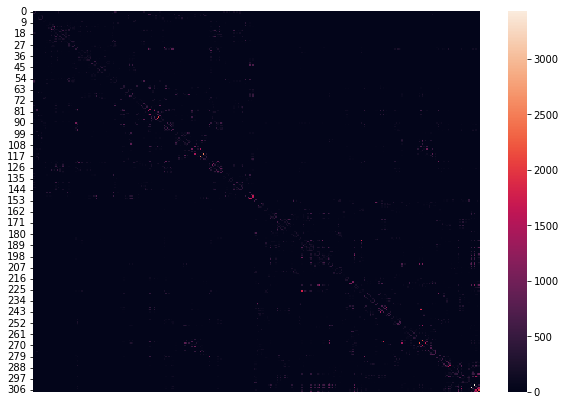

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(DTI_Dublin['nostreamlines_new'][0][0], xticklabels=False, cmap='rocket')

**Maastricht**

In [35]:
DTI_Maastricht = scipy.io.loadmat('/Users/mello/Desktop/Dataset//DTI_Maastricht.mat')

In [36]:
DTI_Maastricht.keys()

dict_keys(['__header__', '__version__', '__globals__', 'nostreamlines_new'])

### 3.2 Regional Mean diffusivity (MD) and functional anisotropy (FA) values

In [37]:
import pandas as pd

In [38]:
MD_Dublin = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_MD_cortexAv_mean_Dublin.csv', delimiter = ',')
MD_Maastricht = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_MD_cortexAv_mean_Maastricht.csv', delimiter = ',')

In [39]:
FA_Dublin = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_FA_cortexAv_mean_Dublin.csv', delimiter = ',')
FA_Maastricht = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_FA_cortexAv_mean_Maastricht.csv', delimiter = ',')

In [40]:
MD_Dublin

,Subject ID,Age,Sex,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,CON3140,37,2,1,0.911,0.931,0.891,1.048,0.881,0.939,...,0.928,1.067,1.096,0.892,1.238,1.021,1.166,0.900,0.907,0.937
1,CON3891,33,2,1,0.861,0.913,0.846,0.927,0.888,0.894,...,0.878,0.985,1.045,1.001,1.196,1.083,1.143,0.917,0.923,0.960
2,CON4664,40,2,1,0.817,0.827,0.828,0.828,0.780,0.843,...,0.847,0.849,0.819,0.952,0.933,0.942,1.059,0.794,0.834,0.860
3,CON7009,21,1,1,0.887,0.905,0.878,0.932,0.820,0.888,...,0.957,0.985,0.989,1.075,1.150,1.017,0.986,0.888,0.916,0.928
4,CON7024,59,1,1,0.887,0.854,0.905,1.011,0.946,0.922,...,0.871,0.952,0.987,1.325,0.996,1.094,1.064,0.966,0.989,0.977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,RPG9102,42,2,2,0.843,0.855,0.940,1.017,0.954,0.840,...,0.938,1.062,1.143,0.903,1.364,1.284,1.218,1.017,0.972,1.028
111,RPG9103,37,1,2,0.911,0.914,0.926,1.001,0.918,1.115,...,0.957,1.085,1.098,1.059,1.268,1.089,1.173,0.990,1.065,1.021
112,RPG9119,41,1,2,0.890,0.899,0.886,0.930,0.883,0.882,...,0.916,1.010,0.974,0.968,1.305,1.168,1.265,0.981,0.975,0.972
113,RPG9121,51,1,2,0.920,0.986,0.883,0.879,0.794,0.983,...,0.942,0.985,0.990,1.199,1.353,1.187,1.444,0.947,1.047,1.085


In [41]:
FA_Dublin

,Subject ID,Age,Sex,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,CON3140,37,2,1,0.322,0.147,0.200,0.143,0.189,0.133,...,0.171,0.150,0.127,0.218,0.163,0.158,0.147,0.157,0.147,0.137
1,CON3891,33,2,1,0.302,0.155,0.234,0.139,0.164,0.145,...,0.155,0.139,0.121,0.185,0.173,0.126,0.151,0.152,0.148,0.152
2,CON4664,40,2,1,0.324,0.180,0.226,0.197,0.206,0.142,...,0.176,0.143,0.150,0.173,0.228,0.144,0.150,0.171,0.174,0.143
3,CON7009,21,1,1,0.323,0.139,0.219,0.154,0.200,0.147,...,0.146,0.128,0.147,0.195,0.174,0.134,0.171,0.164,0.159,0.131
4,CON7024,59,1,1,0.295,0.143,0.168,0.139,0.173,0.171,...,0.156,0.140,0.135,0.325,0.168,0.162,0.167,0.144,0.138,0.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,RPG9102,42,2,2,0.294,0.168,0.238,0.142,0.167,0.162,...,0.144,0.117,0.105,0.199,0.157,0.127,0.136,0.143,0.147,0.134
111,RPG9103,37,1,2,0.293,0.140,0.257,0.151,0.170,0.125,...,0.132,0.106,0.114,0.257,0.164,0.134,0.153,0.157,0.144,0.140
112,RPG9119,41,1,2,0.323,0.173,0.278,0.171,0.188,0.170,...,0.167,0.139,0.143,0.172,0.170,0.157,0.150,0.181,0.143,0.151
113,RPG9121,51,1,2,0.311,0.174,0.226,0.153,0.178,0.127,...,0.145,0.126,0.136,0.158,0.270,0.135,0.140,0.162,0.145,0.123


### 3.3 sMRT: cortical thickness

For the macro-structural data T1-weighted images were used and the surface was parcellated according to a template derived from the Desikan-Killiany atlas into 308 regions. For each of those regions cortical thickness was estimated. Before getting a deeper look into those data, first the atlas is loaded.
The atlas can be accessed via the following github repository: https://github.com/RafaelRomeroGarcia/subParcellation. The files used for visualization are located in the folder "500mm parcellation (308 regions)".

To visualize the atlas, the nilearn module is used. 

In [42]:
from nilearn import image
smoothed_img = image.smooth_img('/Users/mello/data/MSc5_research_project/data/atlas/500.aparc_cortical_consecutive.nii')

TypeError: smooth_img() missing 1 required positional argument: 'fwhm'

In [43]:
import nibabel as nb

In [44]:
f_one = nb.load('/Users/mello/data/MSc5_research_project/data/atlas/500.aparc_cortical_consecutive.nii')
f_two = nb.load('/Users/mello/data/MSc5_research_project/data/atlas/500.aparc.nii')

In [45]:
type(f_one)

nibabel.nifti1.Nifti1Image

In [54]:
test = f_one.get_data()

/Users/mello/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


In [61]:
test.shape

import numpy as np
np.unique(test)

np.where(test==4)

#For isolating regions
#region_1 = test
#region_1[region_1!=1] = 0

(array([153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153,
        153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 154, 154,
        154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154,
        154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154,
        154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154,
        155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
        155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
        155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
        155, 155, 155, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156,
        156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156,
        156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156,
        156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 157,
        157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157,
        157, 157, 157, 157, 157, 157, 157, 157, 157

In [47]:
from nilearn import plotting

/Users/mello/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


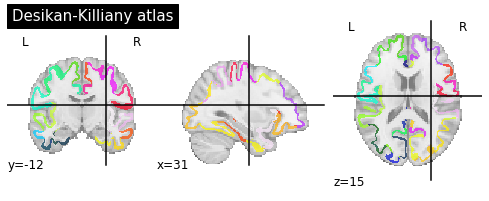

In [48]:
plotting.plot_roi(f_one, title="Desikan-Killiany atlas")

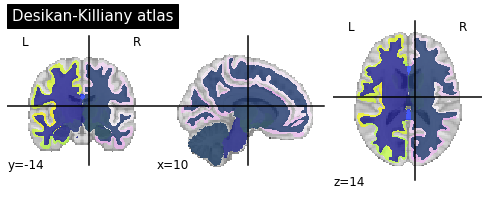

In [49]:
plotting.plot_roi(f_two, title="Desikan-Killiany atlas")

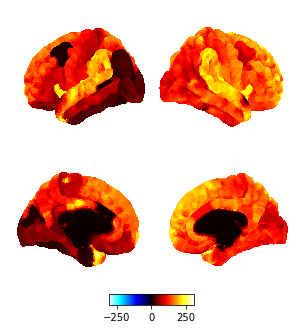

In [63]:
plotting.plot_img_on_surf(f_one,
                          views=['lateral', 'medial'],
                          hemispheres=['left', 'right'],
                          colorbar=True)
plotting.show()

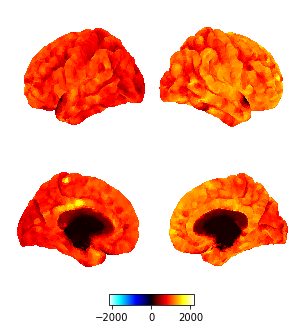

In [64]:
plotting.plot_img_on_surf(f_two,
                          views=['lateral', 'medial'],
                          hemispheres=['left', 'right'],
                          colorbar=True)
plotting.show()

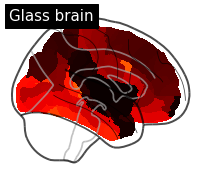

In [76]:
plotting.plot_glass_brain(f_one, display_mode='r', plot_abs=False,
                          title='Glass brain', threshold=2.)

plotting.plot_stat_map(f_one, display_mode='x', threshold=1.,
                       cut_coords=range(0, 51, 10), title='Slices')

In [77]:
plotting.plot_stat_map(f_one, display_mode='x', threshold=1.,
                       cut_coords=range(0, 51, 10), title='Slices')

In [ ]:
CT_Dublin = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_thickness_Dublin.csv', delimiter = ',')
CT_Maastricht = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_thickness_Maast.csv', delimiter = ',')
CT_Cobre = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_thickness_Cobre.csv', delimiter = ',')